1099919 Christopher Tineo Reyes

# Asignación 3

In [4]:
# Importar dependencias

import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

1. Utilizando el dataset de “House Prices.csv” realizar el mapa de calor utilizando la librería de seaborn.

In [5]:
df = read_csv('house-prices.csv', index_col='Home')
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,,,,,,,
1,114300,1790,2,2,2,No,East
2,114200,2030,4,2,3,No,East
3,114800,1740,3,2,1,No,East
4,94700,1980,3,2,3,No,East
5,119800,2130,3,3,3,No,East


In [58]:
# Correlacion Pearson
corr1 = df.corr(method='spearman', numeric_only=False)
corr_pairs1 = corr1.unstack()
print(corr_pairs1["Price"])

Price                 1.000000
SqFt                  0.554613
Bedrooms              0.507379
Bathrooms             0.506411
Offers               -0.309424
Brick_No             -0.432084
Brick_Yes             0.432084
Neighborhood_East    -0.101854
Neighborhood_North   -0.575166
Neighborhood_West     0.699173
dtype: float64


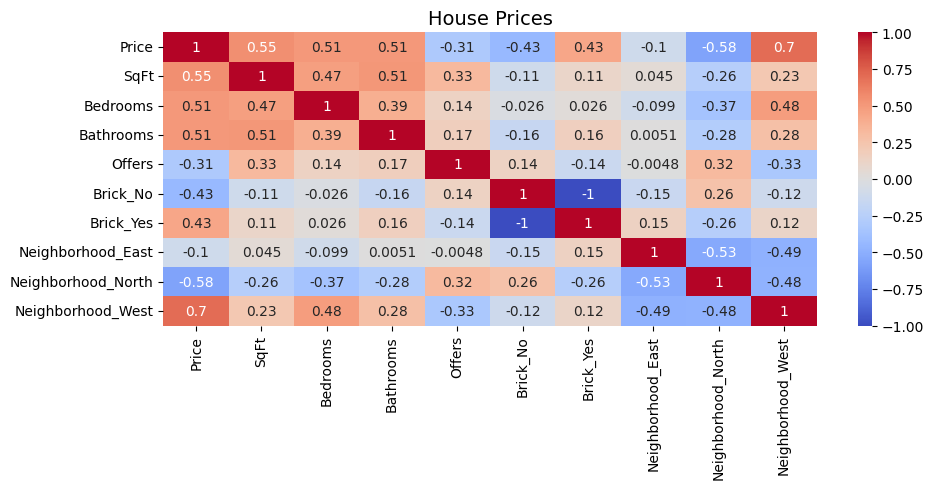

In [59]:
# Visualizar Heatmap
fig, axes = plt.subplots(figsize=(10, 5))

sns.heatmap(corr1, annot=True, annot_kws={"size": 10}, cmap= 'coolwarm', ax=axes)
axes.set_title('House Prices', fontsize=14)

plt.tight_layout()

2. Cambiar los límites del colormap.

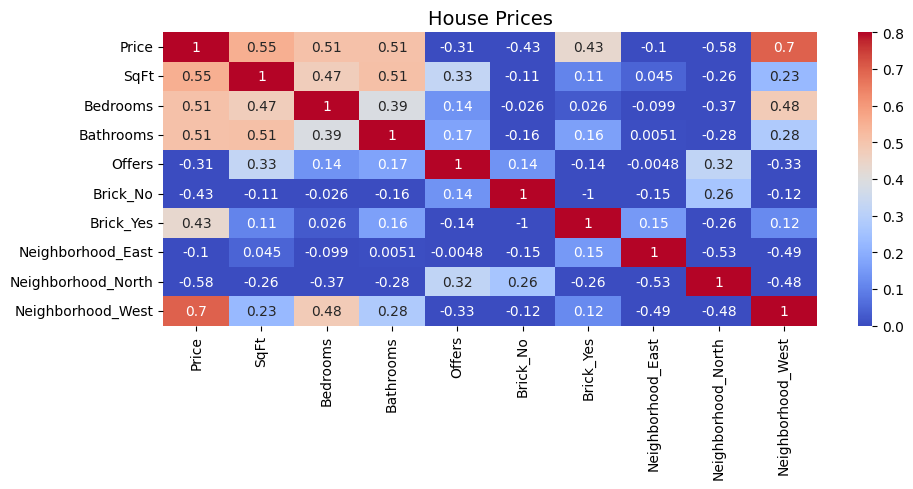

In [60]:
# Visualizar Heatmap
fig, axes = plt.subplots(figsize=(10, 5))

sns.heatmap(corr1, annot=True, vmin=0, vmax=0.8, annot_kws={"size": 10}, cmap= 'coolwarm', ax=axes)
axes.set_title('House Prices', fontsize=14)

plt.tight_layout()

3. Agregar líneas entre cada celda.

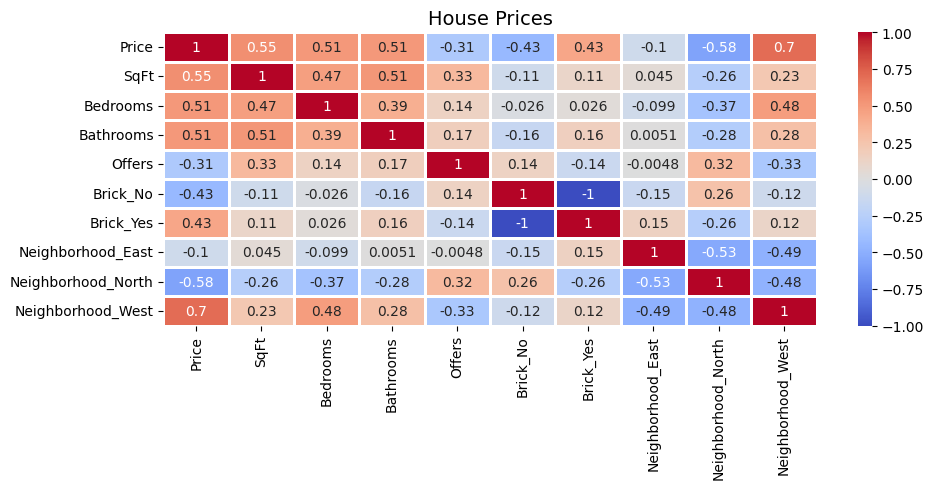

In [61]:
# Visualizar Heatmap
fig, axes = plt.subplots(figsize=(10, 5))

sns.heatmap(corr1, annot=True, linewidth=2, annot_kws={"size": 10}, cmap= 'coolwarm', ax=axes)
axes.set_title('House Prices', fontsize=14)

plt.tight_layout()

4. Utilizar un colormap diferente al mostrado.

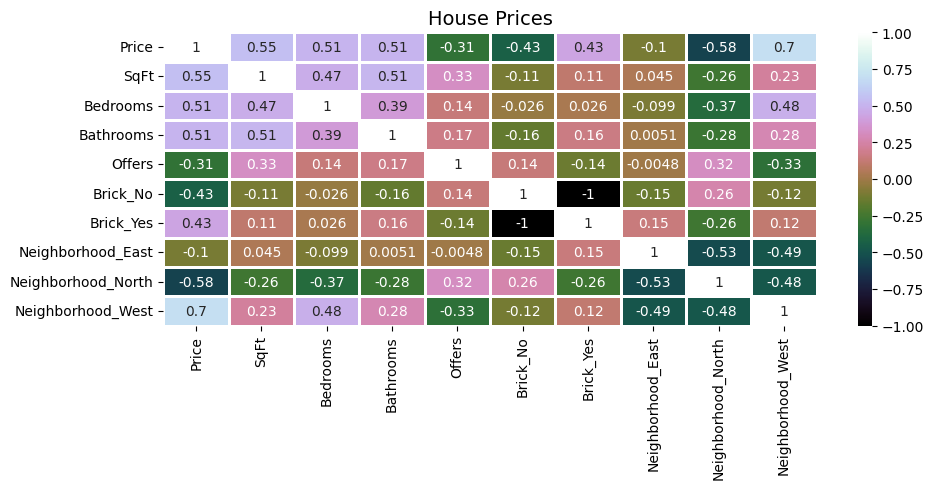

In [62]:
# Visualizar Heatmap
fig, axes = plt.subplots(figsize=(10, 5))

sns.heatmap(corr1, annot=True, linewidth=2, annot_kws={"size": 10}, cmap= 'cubehelix', ax=axes)
axes.set_title('House Prices', fontsize=14)

plt.tight_layout()

5. Use una máscara para trazar solo una parte de una matriz.

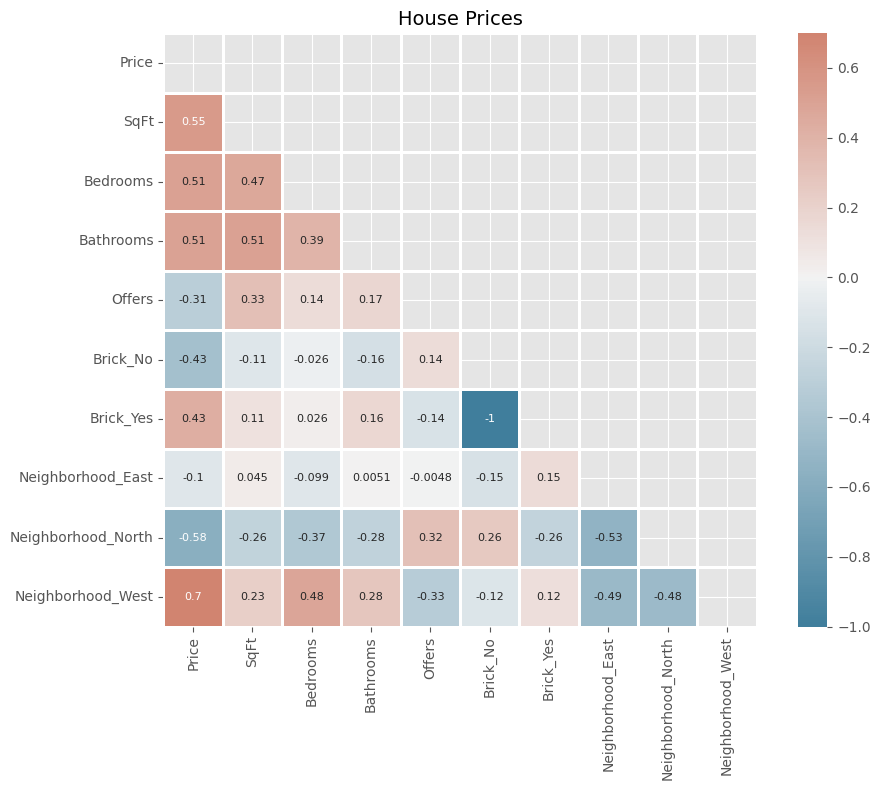

In [76]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Visualizar Heatmap
fig, axes = plt.subplots(figsize=(10, 8))

sns.heatmap(corr1, annot=True, linewidth=2, annot_kws={"size": 8}, cmap=cmap, ax=axes, mask=mask, center=0, square=True)
axes.set_title('House Prices', fontsize=14)

plt.tight_layout()

6. Análisis los resultados obtenidos del mapa de calor.

En este análisis hemos podido identificar con mayor claridad las variables que si tienen impacto en nuestra variable independiente que es el tiempo y que variables como Offers no tienen nada de impacto en nuestro estudio.

Los mayores resultados los hemos encontrados en:
1. Sqft
2. Bedrooms
3. Bathrooms
4. Brick (el unico que tiene impacto es Yes)
5. Neighborhood (El unico que tiene impacto es West)

Estas serán las variables que utilizaremos en nuestro análisis

In [85]:
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
Home,,,,,,,,,,
1,114300,1790,2,2,2,1,0,1,0,0
2,114200,2030,4,2,3,1,0,1,0,0
3,114800,1740,3,2,1,1,0,1,0,0
4,94700,1980,3,2,3,1,0,1,0,0
5,119800,2130,3,3,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
124,119700,1900,3,3,3,0,1,1,0,0
125,147900,2160,4,3,3,0,1,1,0,0
126,113500,2070,2,2,2,1,0,0,1,0


In [86]:
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Brick_No', 'Brick_Yes', 'Neighborhood_East', 'Neighborhood_North', 'Neighborhood_West']]

y = df["Price"]

# Step 5: Split the dataset
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Create the model
multipleVariableModel = LinearRegression()

# Step 7: Train the model
multipleVariableModel.fit(X_mult_train, y_mult_train)


LinearRegression()

In [87]:
# Step 8: Evaluate the model
y_mult_pred = multipleVariableModel.predict(X_mult_test)

Realizar la visualización de los resultados obtenidos por los modelos.

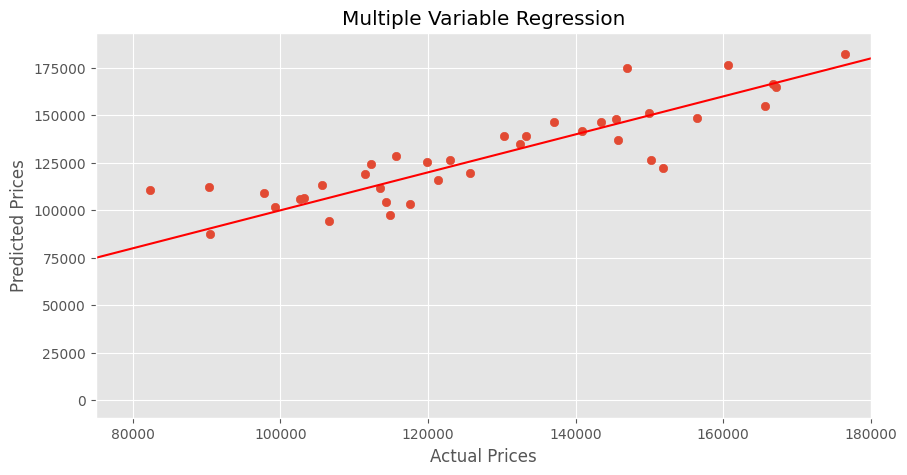

In [88]:
fig = plt.subplots(figsize=(10,5))
plt.scatter(y_mult_test, y_mult_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Variable Regression")

# Add a line plot of the form y = x
max_val = max(y_mult_test.max(), y_mult_pred.max())
plt.plot([0, max_val], [0, max_val], color='red')
plt.xlim(75000, 180000)

plt.show()

Evaluar los valores pronosticado con las métricas r cuadrado y r cuadrado ajustado.

In [89]:
# calculate the R-squared value
r2 = r2_score(y_mult_test, y_mult_pred)

# calculate the adjusted R-squared value
n = len(y_mult_test)
k = X_mult_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# mean absolute percentage error
# calculate the MAPE value
mape = np.mean(np.abs((y_mult_test - y_mult_pred) / y_mult_test)) * 100

# Evaluar valores reales versus valores estimados.

print("Para el modelo multivartiable")

print("R2:", "{0:.4f}".format(r2_score(y_mult_test, y_mult_pred)),)
print('Adjusted R-squared:', adj_r2)
print('MAPE:', mape)

Para el modelo multivartiable
R2: 0.7694
Adjusted R-squared: 0.7078962503305559
MAPE: 7.6953755582239225


Compare los resultados de utilizar con respecto a la práctica anterior.

| Métrica modelo multivariable | Asignacion 3 | Asignacion 4 |
|------------------------------|--------------|--------------|
| R2                           | 0.6494       | 0.7694       |
| R2 Ajustado                  | 0.5836       | 0.7079       |
| MAPE                         | 9.4755       | 7.6954       |

## Entregar un reporte de los resultados obtenidos.

Pues aqui podemos ver una mejoría en la calidad de nuestro modelo con una variación del **0.6494 al 0.7694** y esto gracias al análisis de correlación que realizamos desde un inicio.

Lo primero que hicimos fue descartar aquellas variables con correlación negativa y esto nos acercó más a los resultabamos que buscabamos con nuestro modelo.